In [1]:
# Load pandas
import pandas

# Load numpy too... we'll need it soon.
import numpy as np

In [4]:
# Load the Iris data set
# Note the header=None option...
data = np.array(pandas.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",
                                  delimiter=',',
                                  header=None))
data.shape

(25010, 11)

In [5]:
np.unique(data[:,10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
X = data[:,0:10]
X.shape

(25010, 10)

In [7]:
labels = data[:,10]
import keras
# Convert the integer class labels to a
# categorical or "one-hot" encoding...
Y = keras.utils.to_categorical(labels,
                               len(np.unique(labels)))

# Encoded vector size?
print(Y.shape)

Using TensorFlow backend.


(25010, 10)


In [8]:
## Setting up a single-layer network
model = keras.Sequential()
# Add a densely connected layer of units
# and specify the input layer size (note,
# the input layer is assumed to be there,
# which makes this a single-layer network!)

# Input size - 10
input_size = X.shape[1]

# Output size - 10
output_size = Y.shape[1]

# We are using a sigmoid activation
# function, AND the input_size was
# provided within a python list []...
model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Prep the model for -learning-
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [14]:
# Basic training parameters
batch_size = 16
epochs = 100
validation_split = 0.5

# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_split = validation_split)

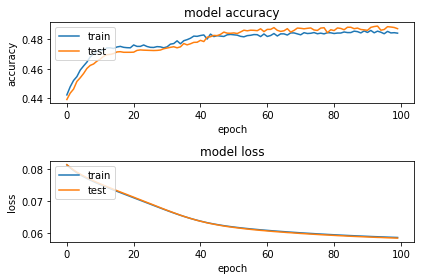

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()  